## EPS Example Notebook 

This notebook shows an example replicating previous the simple electric power system implemented in [IBFM](https://github.com/DesignEngrLab/IBFM) in the `eps example` directory, with some basic fault propagation and visualization.

In [1]:
from eps import EPS
import fmdtools.sim.propagate as propagate
import fmdtools.analyze as an
from fmdtools.analyze.graph import ModelGraph

This script provides some example I/O for using static models, using the EPS system implemented in eps.py as an example.

A graphical representaiton of this system is shown below:

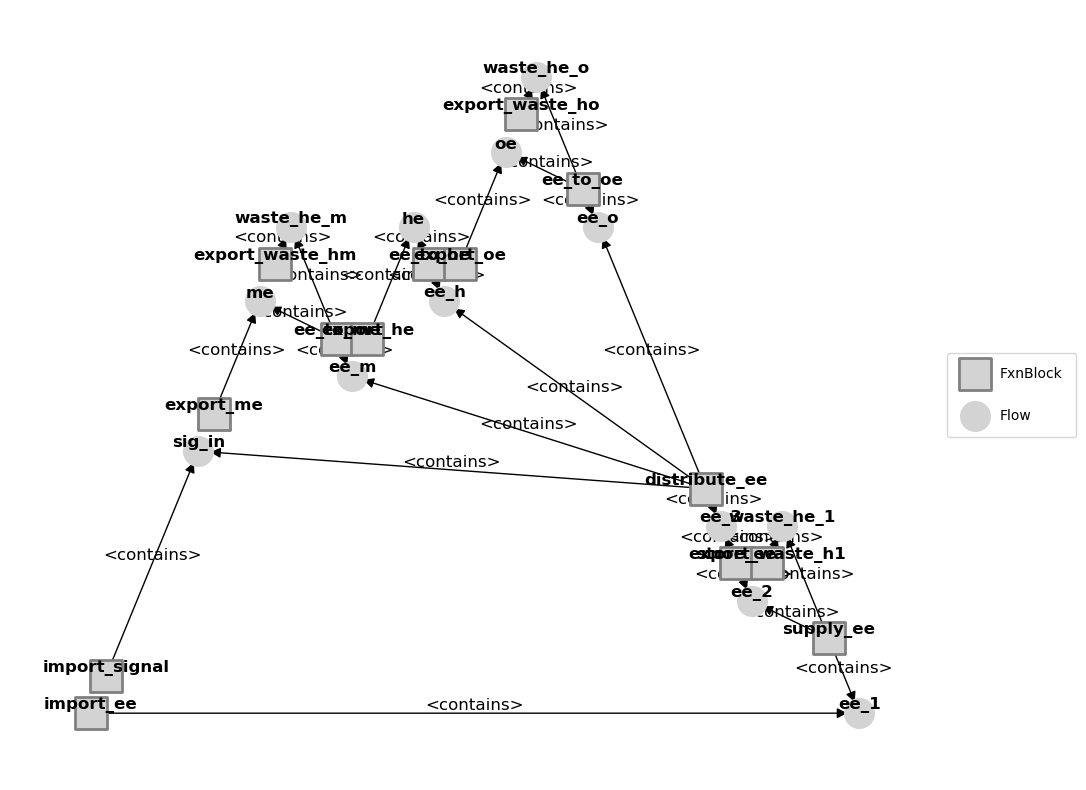

In [2]:
mdl= EPS()
mg = ModelGraph(mdl)
fig, ax = mg.draw()

As with dynamic models, in static models we use ``fp.run_one_fault`` to see the effects of single faults. All setup is performed in the Model class definition

In [3]:
result, mdlhist = propagate.one_fault(mdl, 'ee_to_me', 'toohigh_torque', desired_result="graph")

In this case, however, the output in ``mdlhists`` will be a single-dimensional dictionary (not something we can plot very well)

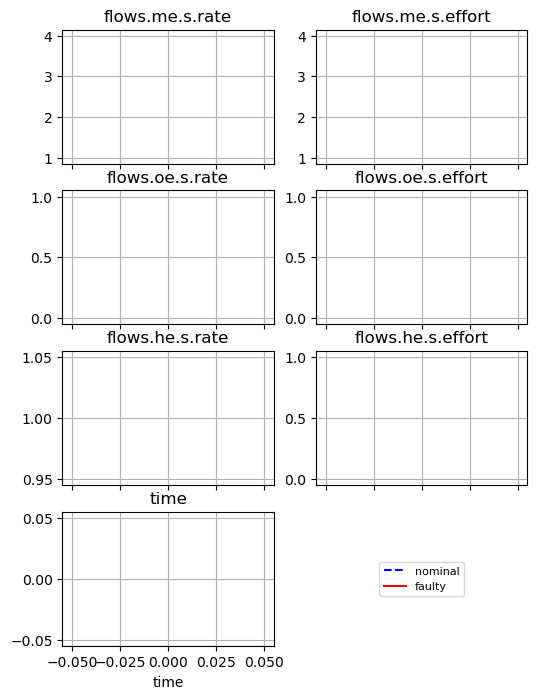

In [4]:
fig, ax = an.plot.hist(mdlhist, *mdlhist.nominal.keys())

As a result, it's better to look at the results graph for a visualization of what went wrong. In this case ``resgraph`` better represents the fault propagation of the system than in a dynamic model, since there is only one time-step to represent (rather than a set)

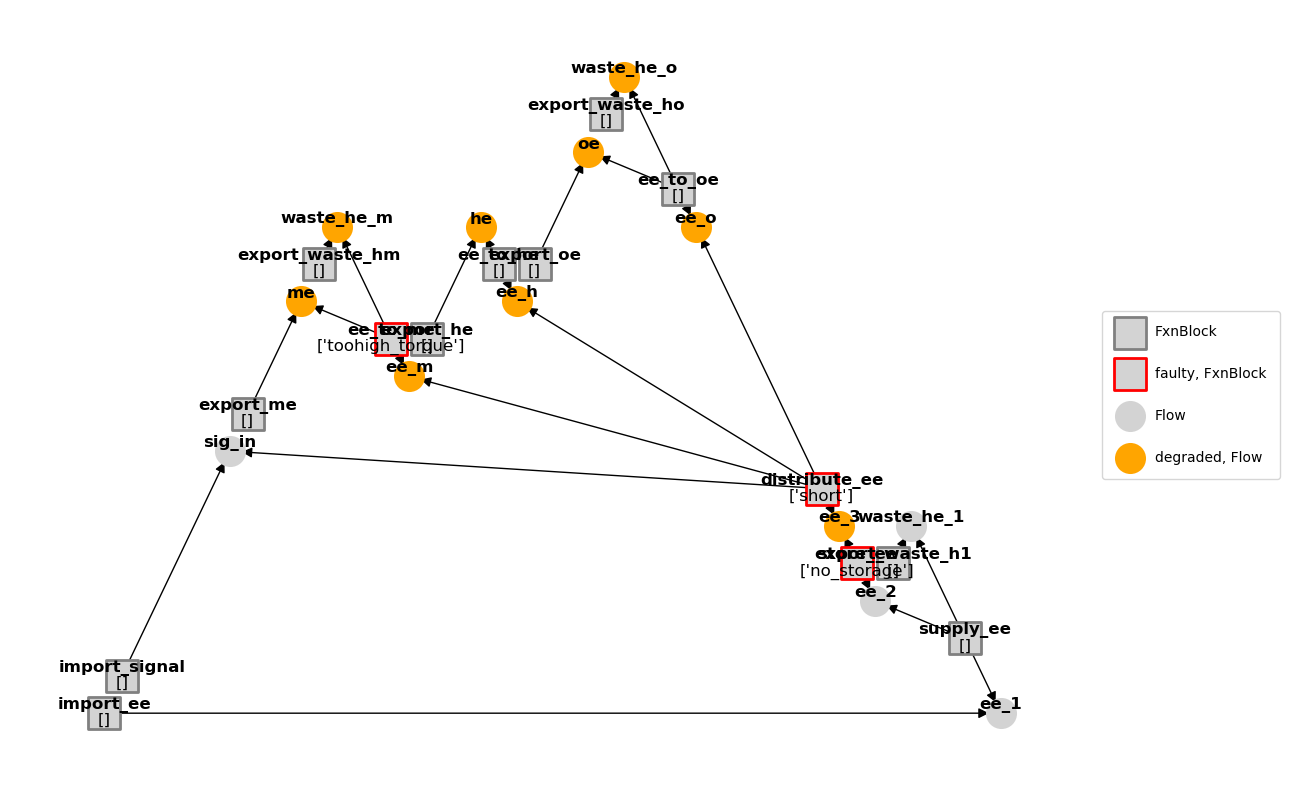

In [5]:
result.graph.set_edge_labels(title='')
fig, ax = result.graph.draw(figsize=(14,10))

We can run the set of single-fault scenarios on this model using ``fmdtools.sim.propagate.single_faults``. For single-fault scenarios, one does not need to use a ``SampleApproach``, since all faults are injected at a single time-step.

In [6]:
endclasses, mdlhists = propagate.single_faults(mdl, staged=True)

SCENARIOS COMPLETE:   0%|          | 0/70 [00:00<?, ?it/s]

SCENARIOS COMPLETE:  11%|█▏        | 8/70 [00:00<00:00, 79.43it/s]

SCENARIOS COMPLETE:  24%|██▍       | 17/70 [00:00<00:00, 81.47it/s]

SCENARIOS COMPLETE:  37%|███▋      | 26/70 [00:00<00:00, 79.04it/s]

SCENARIOS COMPLETE:  49%|████▊     | 34/70 [00:00<00:00, 77.19it/s]

SCENARIOS COMPLETE:  60%|██████    | 42/70 [00:00<00:00, 75.91it/s]

SCENARIOS COMPLETE:  71%|███████▏  | 50/70 [00:00<00:00, 74.83it/s]

SCENARIOS COMPLETE:  83%|████████▎ | 58/70 [00:00<00:00, 74.21it/s]

SCENARIOS COMPLETE:  94%|█████████▍| 66/70 [00:00<00:00, 74.01it/s]

SCENARIOS COMPLETE: 100%|██████████| 70/70 [00:00<00:00, 75.45it/s]

Using ``make_summarytable``, one can see the degradation effects of this fault on the flows:

In [7]:
mdlhists.import_ee_low_v_t0.flows.me.s['rate']

array([0.5])

In [8]:
an.tabulate.result_summary_fmea(endclasses, mdlhists, *mdl.fxns, *mdl.flows)

,degraded,faulty,rate,cost,expected cost
export_he_hot_sink_t0,['he'],[],0.00001,600.0,262.8
export_waste_h1_ineffective_sink_t0,[],[],0.000005,1000.0,219.0
ee_to_he_toohigh_heat_t0,"['me', 'oe', 'he']",[],0.0,5100.0,111.69
import_signal_no_signal_t0,"['me', 'oe', 'he']",[],0.000001,2000.0,87.6
distribute_ee_open_circuit_t0,"['me', 'oe', 'he']",[],0.00003,2750.0,3613.5
import_ee_high_v_t0,"['me', 'oe', 'he']",[],0.000005,3350.0,733.65
supply_ee_major_overload_t0,"['me', 'oe', 'he']",[],0.000003,3650.0,479.61
distribute_ee_poor_alloc_t0,"['me', 'oe', 'he']",[],0.00002,1750.0,1533.0
store_ee_no_storage_t0,"['me', 'oe', 'he']",[],0.000005,3250.0,711.75
export_waste_ho_ineffective_sink_t0,[],[],0.000005,1000.0,219.0
